# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("../Datasets/Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
Y = Y.reshape(-1,1) 
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
SC_X = StandardScaler()
X = SC_X.fit_transform(X)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [6]:
SC_Y = StandardScaler()
Y = SC_Y.fit_transform(Y)
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training SVR model on the whole dataset

In [9]:
Y_new = Y.flatten()
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y_new)

SVR()

## Predicting new result

In [12]:
SC_Y.inverse_transform(regressor.predict(SC_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

In [20]:
SC_Y.inverse_transform(regressor.predict(X))

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

Text(0, 0.5, 'Salary')

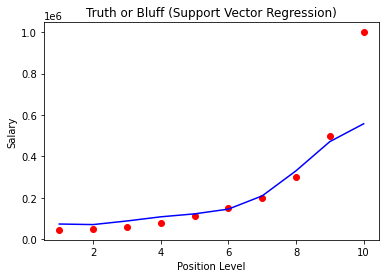

In [21]:
plt.scatter(SC_X.inverse_transform(X), SC_Y.inverse_transform(Y), color='red')
plt.plot(SC_X.inverse_transform(X),SC_Y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## Visualising the SVR results (High Resolution)

Text(0, 0.5, 'Salary')

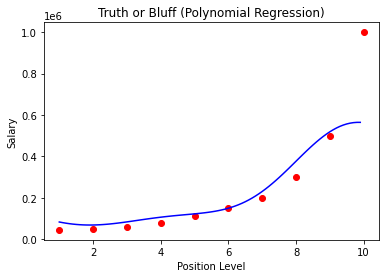

In [22]:
X_grid = np.arange(min(SC_X.inverse_transform(X)), max(SC_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(SC_X.inverse_transform(X), SC_Y.inverse_transform(Y), color='red')
plt.plot(X_grid,SC_Y.inverse_transform(regressor.predict(SC_X.fit_transform(X_grid))), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')